In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
import testing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ip = "147.32.83.171"

C:\Users\zdesi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
ssh_tunnel = SSHTunnelForwarder(
    ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))
result_engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='betexplorer'
    ))



In [9]:
testing_probs = [0.5,0.6,0.7,0.8,0.9,0.95,1]
profits = {}
betting_vectors = {}
for p in testing_probs:
   profits[p],betting_vectors[p]=testing.test(p=p, timestamp='2022-09-27 21:00:00',engine=engine,res_engine=result_engine)

Academic license - for non-commercial use only - expires 2023-11-03
Using license file C:\Users\zdesi\gurobi.lic
    PosState  _1x2_draw  _1x2_away  _ou_Under_3.5  _ou_Under_2.0  \
0        0-0      2.539     -1.000          0.316           1.69   
1        1-0     -1.000     -1.000          0.316           1.69   
2        2-0     -1.000     -1.000          0.316           0.00   
3        3-0     -1.000     -1.000          0.316          -1.00   
4        4-0     -1.000     -1.000         -1.000          -1.00   
..       ...        ...        ...            ...            ...   
116     6-10     -1.000      2.916         -1.000          -1.00   
117     7-10     -1.000      2.916         -1.000          -1.00   
118     8-10     -1.000      2.916         -1.000          -1.00   
119     9-10     -1.000      2.916         -1.000          -1.00   
120    10-10      2.539     -1.000         -1.000          -1.00   

     _ou_Under_3.0  _ou_Under_1.5  _ou_Under_4.5  _ou_Under_2.5  \
0  

In [ ]:
cumulative_sums = {}
lengths = {}
for p in testing_probs:
    #cumulative_sums[p]=np.cumsum(results[p])
    #lengths[p] = len(results[p])
    print(sum(profits[p])/len(profits[p]))

In [ ]:
plt.boxplot(profits.values(),labels=profits.keys())
plt.title("Profit from the bets")
plt.show()




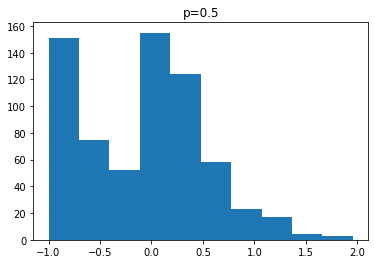

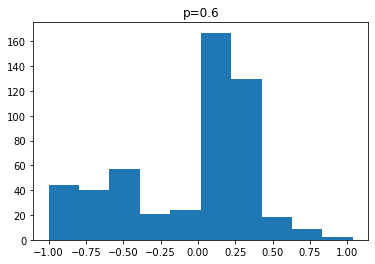

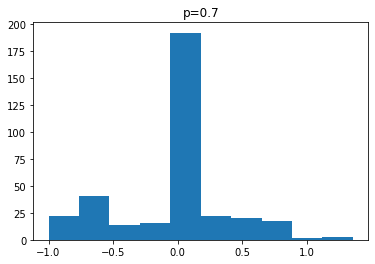

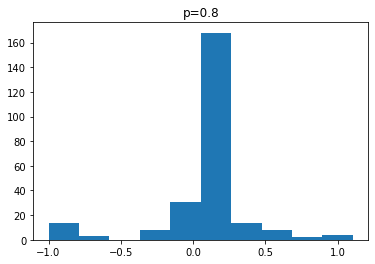

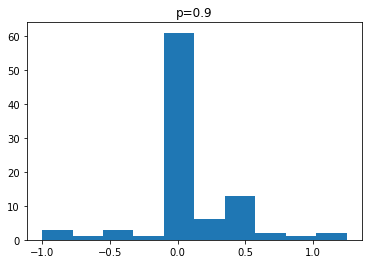

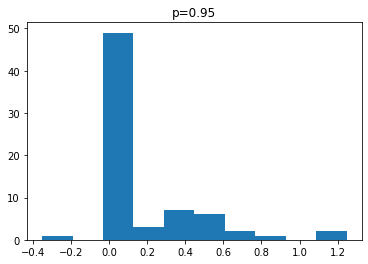

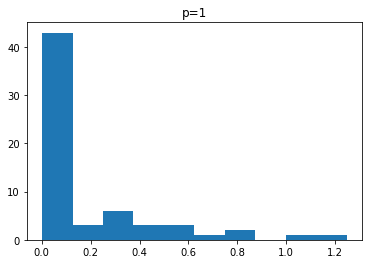

In [10]:
partial_sums = {}
for p in testing_probs:
    partial_sums[p] = []
    for n in betting_vectors[p]:
        #print(n)
        partial_sums[p].append(sum(n[:-1]))
    hlp =np.array(profits[p])/np.array(partial_sums[p])
    plt.hist(hlp)
    plt.title('p={p}'.format(p=p))
    plt.show()

#shows ratio between invested amount and profited amount

In [11]:
for p in testing_probs:
    print(len(profits[p]))

662
512
349
252
93
71
63
